**TEAM CYRO-GEN ZWIFT TTT research**

***Colorborators: join the fun here:***
[Slack](https://join.slack.com/t/vyrtyfy/shared_invite/zt-hhlouu3l-TT5j7d9J5bqd8by4AEdSjQ)
* Vincent Davis

#### TODO's
* find a nice way to identify or estimate the start point (lat, lon).
* normalize (to event average) graph of team power.
* normilize team power based on slope and speed^2 ingnoring acceleration/deceleration
* build some tools/script to make it easy to load/merge a teams data into a dataframe

#### Downloads and installs For google CoLab
This downloadas data file and software from the github repo found here:
[VYRTYFY_research at Github.com](https://github.com/vincentdavis/VYRTYFY_research)



In [1]:
# # Get the datafiles, uncomment the next line to reclone the repo.
# !rm -r VYRTYFY_research
# !git clone https://github.com/vincentdavis/VYRTYFY_research.git
# # List the data files
# !ls VYRTYFY_research/zwift/Terns/csv/2020-09-10
# # calculate distance.
# !pip install -r requirments haversine

#### Individual rider stats:
It might be best to get individual rider performace stats (heart rate, FTP, 20, 5, .... records) and we could use ZwiftPower to to automate this or manualy get it. What I think is better and simpler is to just calculate and use 5min max values as the normilizing factor.

**Read in and merge the data:**

* Looking at the Terns team first
* Excluding Marin until I get a new data file.

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from pathlib import Path
from zttt import merge_activities, rolling_metrics, team_position, distance

# set the path for the data you want
p = Path('zwift/Terns/csv/2020-09-10').glob('**/*')
df, names = merge_activities(p)

df.head(5)

*** zwift/Terns/csv/2020-09-10/Sam.csv
*** zwift/Terns/csv/2020-09-10/Mike.csv
*** zwift/Terns/csv/2020-09-10/Tom.csv
*** zwift/Terns/csv/2020-09-10/Joel.csv
*** zwift/Terns/csv/2020-09-10/Martin.csv
*** zwift/Terns/csv/2020-09-10/David.csv


,Date_Time,Latitude_Sam,Longitude_Sam,Altitude_Sam,Speed_Sam,Cadence_Sam,Power_Sam,Latitude_Mike,Longitude_Mike,Altitude_Mike,...,Heartrate_Martin,Cadence_Martin,Power_Martin,Latitude_David,Longitude_David,Altitude_David,Speed_David,Heartrate_David,Cadence_David,Power_David
0,2020-09-10 11:21:14,53.990345,-1.541703,124.8,12.73,86.0,479.0,53.990346,-1.541734,124.6,...,131,114.0,479.0,53.990341,-1.541594,124.8,10.72,159,112.0,283.0
1,2020-09-10 11:21:15,53.990319,-1.541505,124.8,12.83,86.0,479.0,53.990334,-1.541557,124.8,...,133,116.0,479.0,53.990300,-1.541445,124.8,10.65,161,111.0,283.0
2,2020-09-10 11:21:16,53.990242,-1.541367,125.0,12.85,84.0,450.0,53.990278,-1.541408,124.8,...,135,117.0,362.0,53.990228,-1.541345,125.0,10.50,162,111.0,240.0
3,2020-09-10 11:21:17,53.990139,-1.541290,125.2,12.80,81.0,406.0,53.990189,-1.541316,125.0,...,137,116.0,336.0,53.990142,-1.541285,125.2,10.32,163,111.0,248.0
4,2020-09-10 11:21:18,53.990019,-1.541234,125.4,12.70,79.0,390.0,53.990090,-1.541263,125.2,...,138,118.0,398.0,53.990051,-1.541243,125.4,10.15,164,110.0,248.0


# Rider event stats: *(reworking this)*

In [3]:
stats = rolling_metrics(df, names, hr=False)
print(stats)

# Team Stats
df['total_power'] = df[[f'Power_{n}' for n in names]].sum(axis=1)
print(f"Total power: avg: {df[60:-30]['total_power'].mean():.2f}, max: {df[60:-30]['total_power'].max():.2f}, min: {df[60:-30]['total_power'].min():.2f}")

{'Sam': {'w30min': 80.13333333333334, 'w30max': 424.0, 'w60min': 199.08333333333334, 'w60max': 381.65, 'w300min': 255.2, 'w300max': 346.58483754512633, 'w1200min': 302.13166666666666, 'w1200max': 323.47942905121744}, 'Mike': {'w30min': 61.793103448275865, 'w30max': 417.06666666666666, 'w60min': 214.68333333333334, 'w60max': 401.85, 'w300min': 265.63829787234044, 'w300max': 362.76140350877193, 'w1200min': 308.65784671532845, 'w1200max': 321.64814814814815}, 'Tom': {'w30min': 222.56666666666666, 'w30max': 474.46666666666664, 'w60min': 238.05, 'w60max': 450.2456140350877, 'w300min': 308.38, 'w300max': 387.6550522648084, 'w1200min': 333.97497842968073, 'w1200max': 353.225}, 'Joel': {'w30min': 28.633333333333333, 'w30max': 498.2, 'w60min': 158.61666666666667, 'w60max': 416.26666666666665, 'w300min': 293.87333333333333, 'w300max': 375.6333333333333, 'w1200min': 324.45666666666665, 'w1200max': 342.2195791399817}, 'Martin': {'w30min': 122.76666666666667, 'w30max': 346.8, 'w60min': 136.41666666

# A few initial plots:

*   Normilized 5min max power of each rider: Hard to seee anything here.
*   MISSING SOME DATA: Normalized HR for each rider



True


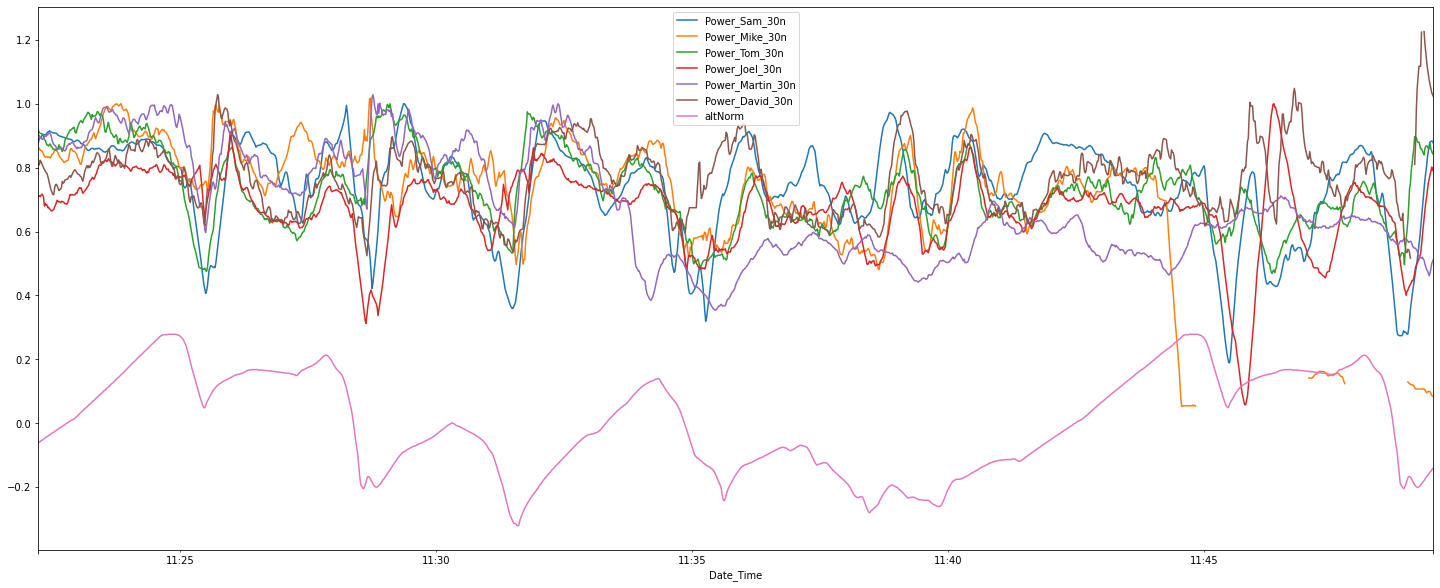

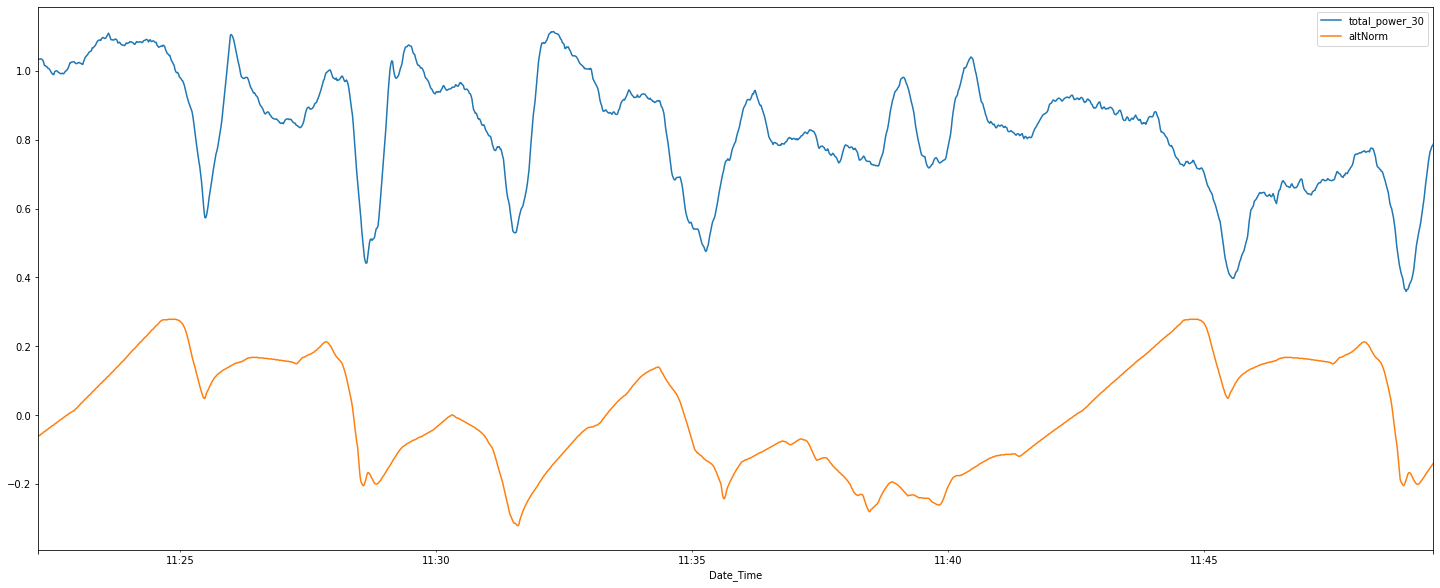

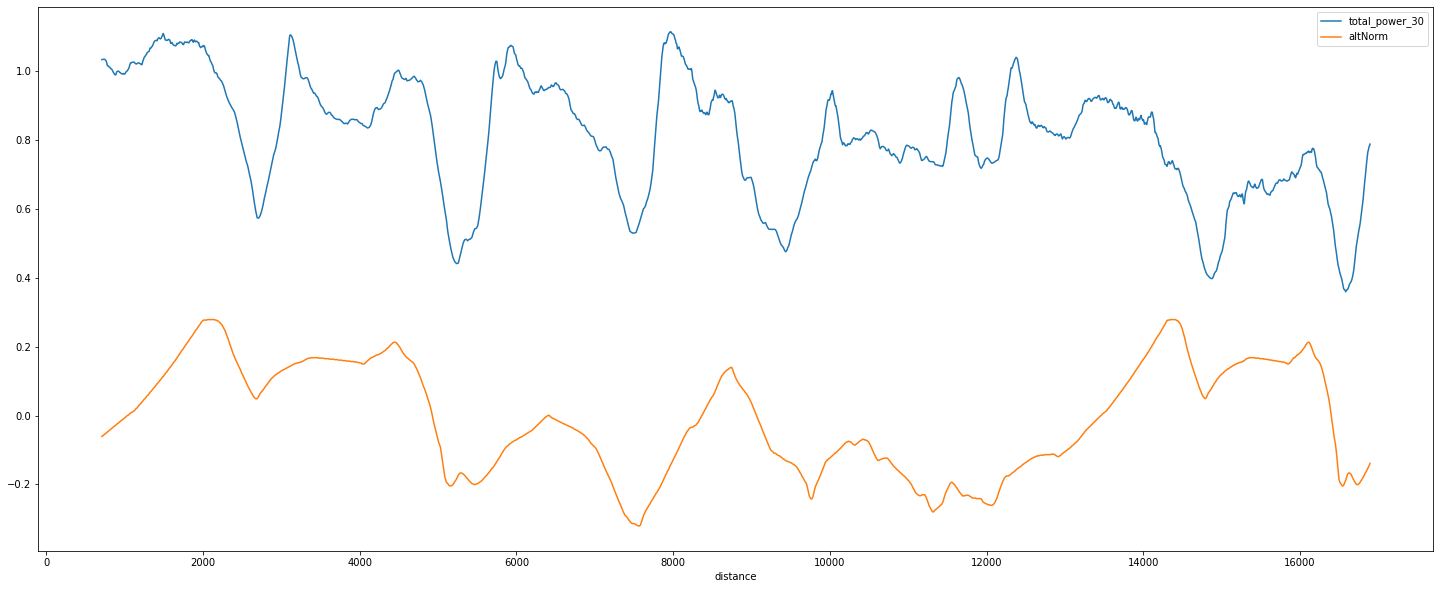

In [4]:
df = team_position(df, names)
distmetrics = distance(df)

df = distmetrics['df']

print('distance' in df.columns)

# list of columns with power
pc = [c for c in df.columns if c.split('_')[0]=='Power']
# list of columns with heartrate
# hrc = [c for c in df.columns if c.split('_')[0]=='Heartrate']


# for c in hc: # 30sec rolling hr
#   n = c.split('_')[1]
#   df[f'Heartrate_{n}_30n'] = df[c].rolling(30, min_periods=10).mean()/df[c].mean()

for c in pc: # 30sec rolling Power
    n = c.split('_')[1]
    df[f'Power_{n}_30n'] = df[c].rolling(30, min_periods=10).mean()/stats[n]['w30max']


# hc30 = [c for c in df.columns if c.split('_')[0]=='Heartrate' and c.split('_')[-1]=='30n']
pc30 = [c for c in df.columns if c.split('_')[0]=='Power' and c.split('_')[-1]=='30n']

df['altNorm'] = (df.Altitude_Sam/df.Altitude_Sam.mean())-1 # creat a ampliphied version of the altitude
a = df[60:-30].plot(x='Date_Time', y=pc30, figsize=(25,10))
df[60:-30].plot(x='Date_Time', y='altNorm', figsize=(25,10), ax=a)

# df[60:-30].plot(x='Date_Time', y=hc30, figsize=(25,10))

# df[60:-30].plot(x='Date_Time', y='total_power', figsize=(25,10))

df['altX10'] = df.Altitude_Sam*10 # creat a ampliphied version of the altitude
df['total_power_30'] = df['total_power'].rolling(30).mean()/df['total_power'].rolling(300).mean().max()
a = df[60:-30].plot(x='Date_Time', y='total_power_30', figsize=(25,10))
df[60:-30].plot(x='Date_Time', y='altNorm', figsize=(25,10), ax=a)


a = df[60:-30].plot(x='distance', y='total_power_30', figsize=(25,10))
df[60:-30].plot(x='distance', y='altNorm', figsize=(25,10), ax=a)

# import matplotlib.pyplot as plt

# fig=plt.figure()
# a=fig.add_axes((0.05,0.05,0.4,0.4)) # number here are coordinate (left,bottom,width,height)
# b=fig.add_axes((0.05,0.5,0.4,0.4))
# c=fig.add_axes((0.5,0.05,0.4,0.85))

# df1.plot('type_of_plot', ax=a);
# df2.plot('type_of_plot', ax=b);
# df3.plot('type_of_plot', ax=c);

# plt.show()

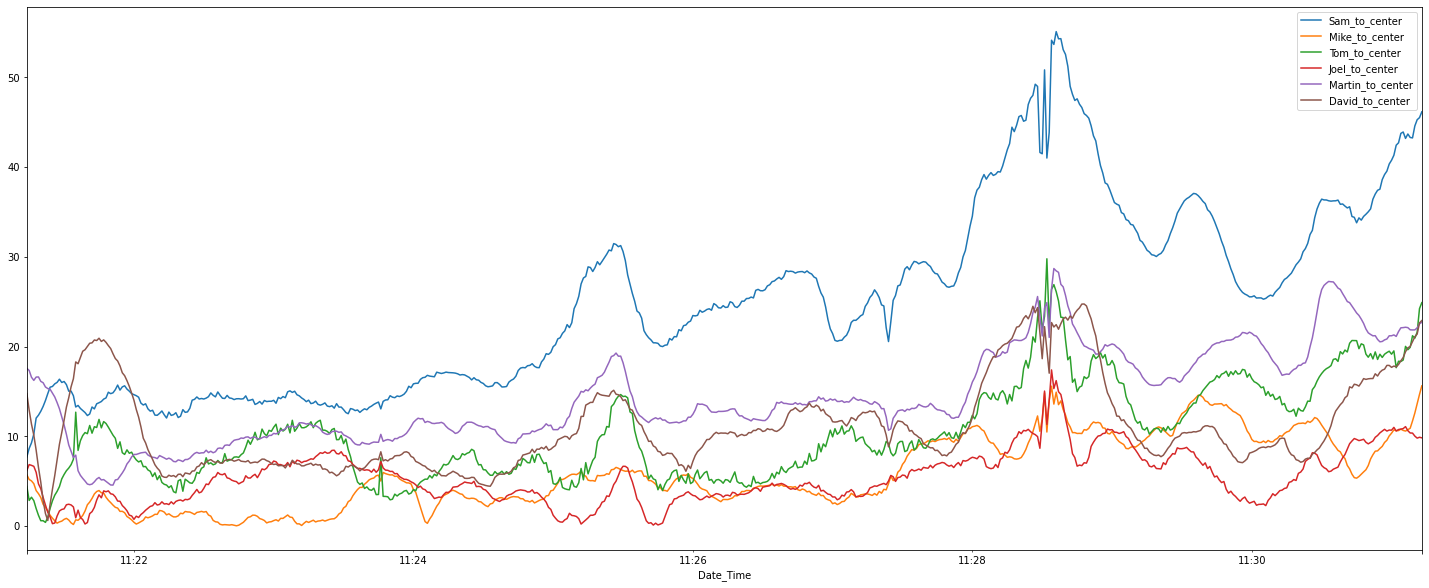

In [5]:

df['Altitude_scale_1'] = df.altNorm*200
col = [c for c in df.columns if 'to_center' in c]
a = df[:600].plot(x='Date_Time', y=col, figsize=(25,10))
# df[:600].plot(x='Date_Time', y='Altitude_scale_1', figsize=(25,10), ax=a)

## GULLS

In [94]:
import pandas as pd
from pathlib import Path
from zttt import merge_activities, rolling_metrics, team_position

# set the path for the data you want
p = Path('zwift/Gulls/csv/2020-09-10').glob('**/*')
fix_time = {'Mateusz':3, 'Damian': -2, 'Ashley':1, 'Alex': 0, 'RJ': 0, 'Vincent': -1, 'Ryan':0}
Gulls, Gnames = merge_activities(p, fix_time)

Gulls.head(5)

*** zwift/Gulls/csv/2020-09-10/Mateusz.csv
*** zwift/Gulls/csv/2020-09-10/Damian.csv
*** zwift/Gulls/csv/2020-09-10/Ashley.csv
*** zwift/Gulls/csv/2020-09-10/Alex.csv
*** zwift/Gulls/csv/2020-09-10/RJ.csv
*** zwift/Gulls/csv/2020-09-10/Vincent.csv
*** zwift/Gulls/csv/2020-09-10/Ryan.csv


,Date_Time,Latitude_Mateusz,Longitude_Mateusz,Altitude_Mateusz,Speed_Mateusz,Heartrate_Mateusz,Cadence_Mateusz,Power_Mateusz,Latitude_Damian,Longitude_Damian,...,Heartrate_Vincent,Cadence_Vincent,Power_Vincent,Latitude_Ryan,Longitude_Ryan,Altitude_Ryan,Speed_Ryan,Heartrate_Ryan,Cadence_Ryan,Power_Ryan
0,2020-09-10 12:04:17,53.990330,-1.541906,124.6,11.79,157,93.0,363.0,53.990346,-1.541770,...,129,80.0,339.0,53.990335,-1.541905,124.6,11.14,110,99.0,433.0
1,2020-09-10 12:04:18,53.990346,-1.541725,124.8,11.99,159,93.0,363.0,53.990341,-1.541604,...,131,80.0,361.0,53.990352,-1.541737,124.8,11.35,111,98.0,404.0
2,2020-09-10 12:04:19,53.990330,-1.541540,124.8,12.15,160,89.0,337.0,53.990303,-1.541453,...,133,78.0,368.0,53.990341,-1.541566,124.8,11.53,111,95.0,441.0
3,2020-09-10 12:04:20,53.990266,-1.541391,125.0,12.15,162,88.0,309.0,53.990234,-1.541347,...,135,75.0,351.0,53.990287,-1.541418,124.8,11.67,111,96.0,472.0
4,2020-09-10 12:04:21,53.990169,-1.541307,125.2,12.10,164,88.0,309.0,53.990142,-1.541285,...,137,74.0,344.0,53.990196,-1.541324,125.0,11.73,111,99.0,448.0


In [95]:
stats = rolling_metrics(Gulls, Gnames, hr=True)
print(stats)

# Team Stats
Gulls['total_power'] = Gulls[[f'Power_{n}' for n in Gnames]].sum(axis=1)
print(f"Total power: avg: {Gulls[60:-30]['total_power'].mean():.2f}, max: {Gulls[60:-30]['total_power'].max():.2f}, min: {Gulls[60:-30]['total_power'].min():.2f}")

{'Mateusz': {'w30min': 228.2, 'w30max': 380.93333333333334, 'hr30min': 168.53333333333333, 'hr30max': 179.03333333333333, 'w60min': 251.5, 'w60max': 357.51666666666665, 'hr60min': 169.36666666666667, 'hr60max': 178.98333333333332, 'w300min': 282.85333333333335, 'w300max': 316.78333333333336, 'hr300min': 170.59333333333333, 'hr300max': 177.22666666666666, 'w1200min': 295.51166666666666, 'w1200max': 309.72105742935275, 'hr1200min': 173.74444444444444, 'hr1200max': 175.79166666666666}, 'Damian': {'w30min': 194.1, 'w30max': 455.5, 'hr30min': 157.86666666666667, 'hr30max': 176.33333333333334, 'w60min': 235.26666666666668, 'w60max': 416.8, 'hr60min': 160.35, 'hr60max': 176.01666666666668, 'w300min': 312.7266666666667, 'w300max': 379.9851851851852, 'hr300min': 167.03666666666666, 'hr300max': 172.13333333333333, 'w1200min': 329.581317764804, 'w1200max': 358.3167128347184, 'hr1200min': 168.86083333333335, 'hr1200max': 169.875}, 'Ashley': {'w30min': 98.43333333333334, 'w30max': 402.0333333333333

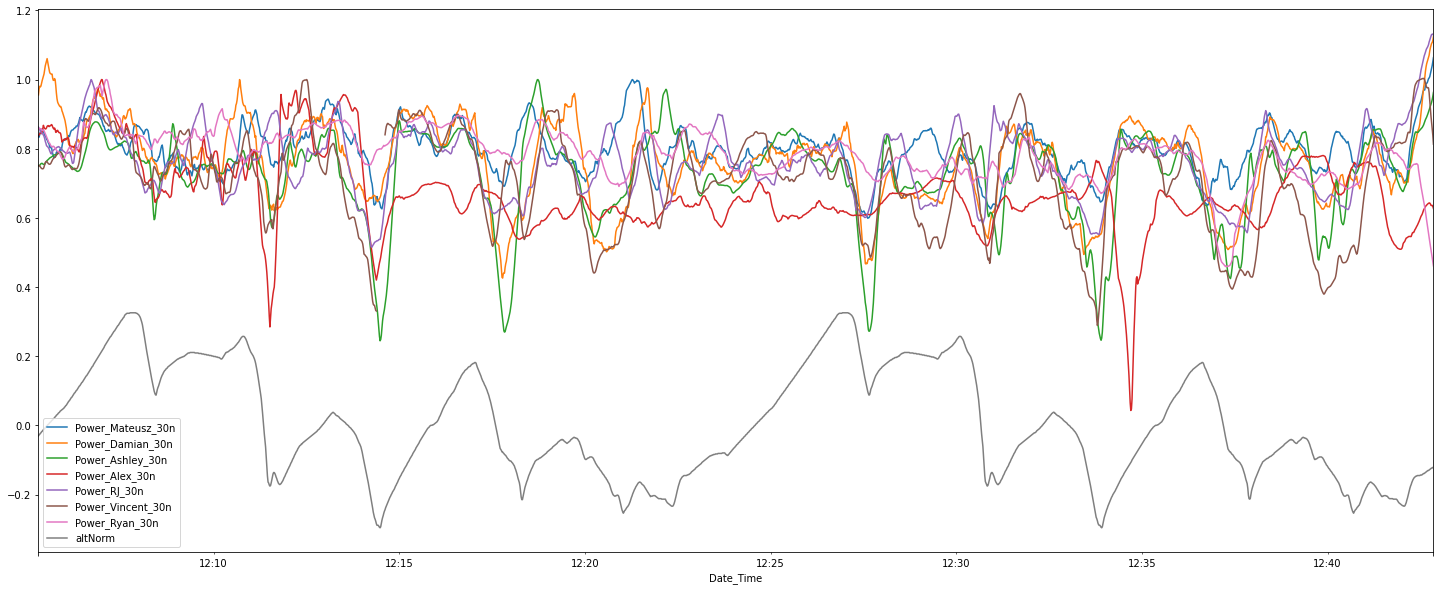

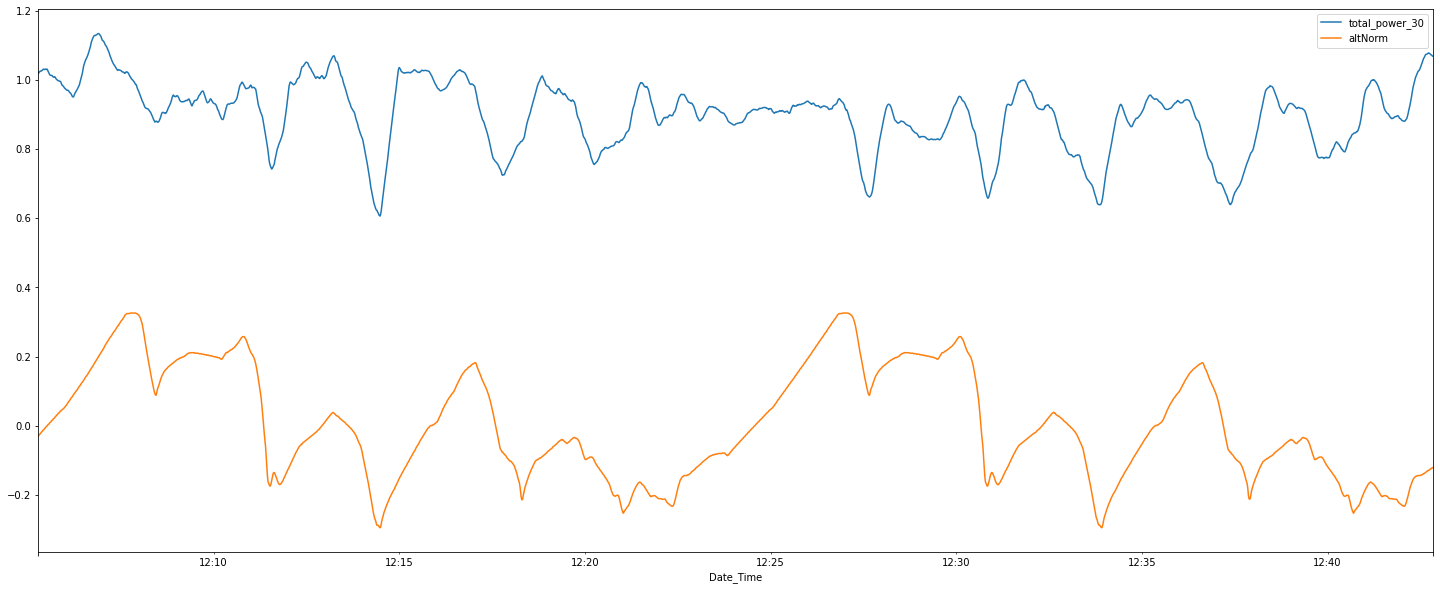

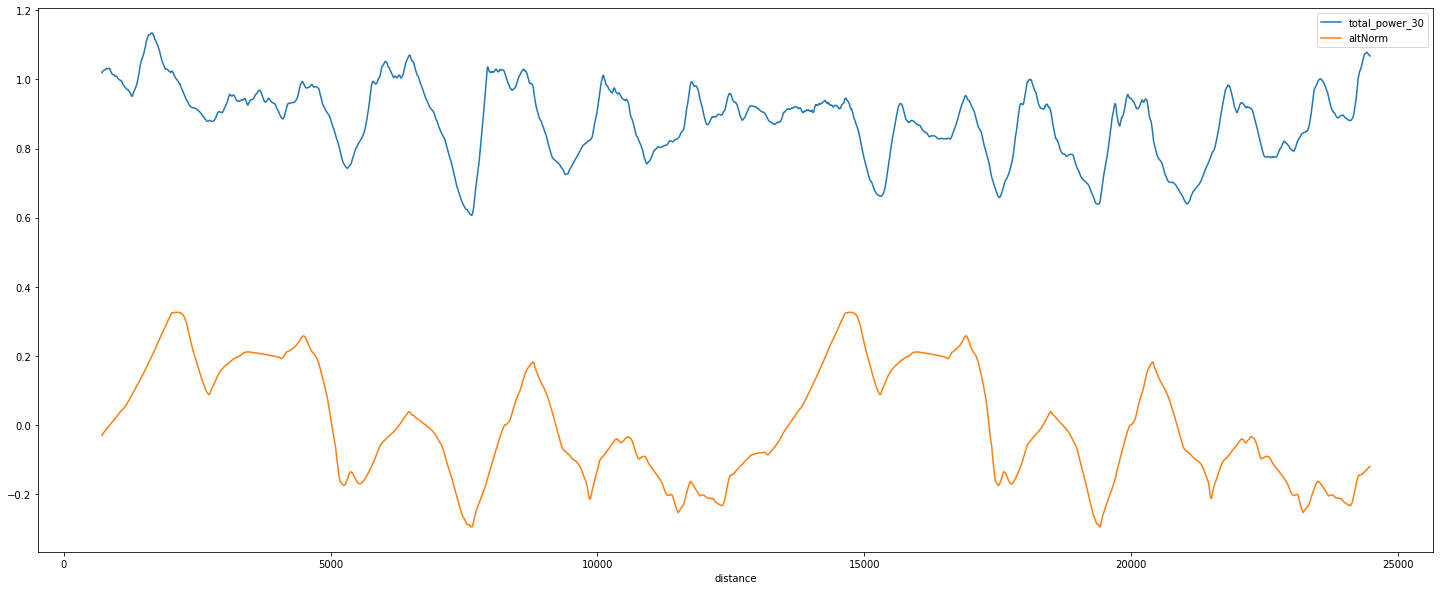

In [96]:
Gulls = team_position(Gulls, Gnames)
distmetrics = distance(Gulls)
Gulls = distmetrics['df']

# list of columns with power
pcol = [c for c in Gulls.columns if c.split('_')[0]=='Power']
# list of columns with heartrate
hrcol = [c for c in Gulls.columns if c.split('_')[0]=='Heartrate']

# Calculate 30sec rolling hr for each rider normilized to rider 5min max
for c in hrcol: 
    n = c.split('_')[1]
    df[f'Heartrate_{n}_30n'] = Gulls[c].rolling(30, min_periods=10).mean()/stats[n]['hr30max']

for c in pcol: # 30sec rolling Power for each rider normilized to rider 5min max
  n = c.split('_')[1]
  Gulls[f'Power_{n}_30n'] = Gulls[c].rolling(30, min_periods=10).mean()/stats[n]['w30max']


# These are the new 30 sec normilized power columns
hrc30 = [c for c in Gulls.columns if c.split('_')[0]=='Heartrate' and c.split('_')[-1]=='30n']
pc30 = [c for c in Gulls.columns if c.split('_')[0]=='Power' and c.split('_')[-1]=='30n']

# Scaled Altitude for overlaying on different plots, We choose a representitive rider for the measure
Gulls['altNorm'] = (Gulls.Altitude_Ryan/Gulls.Altitude_Ryan.mean())-1 # creat a ampliphied version of the altitude
Gulls['altX10'] = Gulls.Altitude_Ryan*10 # creat a ampliphied version of the altitude


a = Gulls[60:-30].plot(x='Date_Time', y=pc30, figsize=(25,10))
Gulls[60:-30].plot(x='Date_Time', y='altNorm', figsize=(25,10), ax=a)

# Gulls[60:-30].plot(x='Date_Time', y=hc30, figsize=(25,10))

# Gulls[60:-30].plot(x='Date_Time', y='total_power', figsize=(25,10))

max300secteampower = Gulls['total_power'].rolling(300).mean().max()
Gulls['total_power_30'] = Gulls['total_power'].rolling(30).mean()/max300secteampower

a = Gulls[60:-30].plot(x='Date_Time', y='total_power_30', figsize=(25,10))
Gulls[60:-30].plot(x='Date_Time', y='altNorm', figsize=(25,10), ax=a)

a = Gulls[60:-30].plot(x='distance', y='total_power_30', figsize=(25,10))
Gulls[60:-30].plot(x='distance', y='altNorm', figsize=(25,10), ax=a)


# import matplotlib.pyplot as plt

# fig=plt.figure()
# a=fig.add_axes((0.05,0.05,0.4,0.4)) # number here are coordinate (left,bottom,width,height)
# b=fig.add_axes((0.05,0.5,0.4,0.4))
# c=fig.add_axes((0.5,0.05,0.4,0.85))

# Gulls1.plot('type_of_plot', ax=a);
# Gulls2.plot('type_of_plot', ax=b);
# Gulls3.plot('type_of_plot', ax=c);

# plt.show()

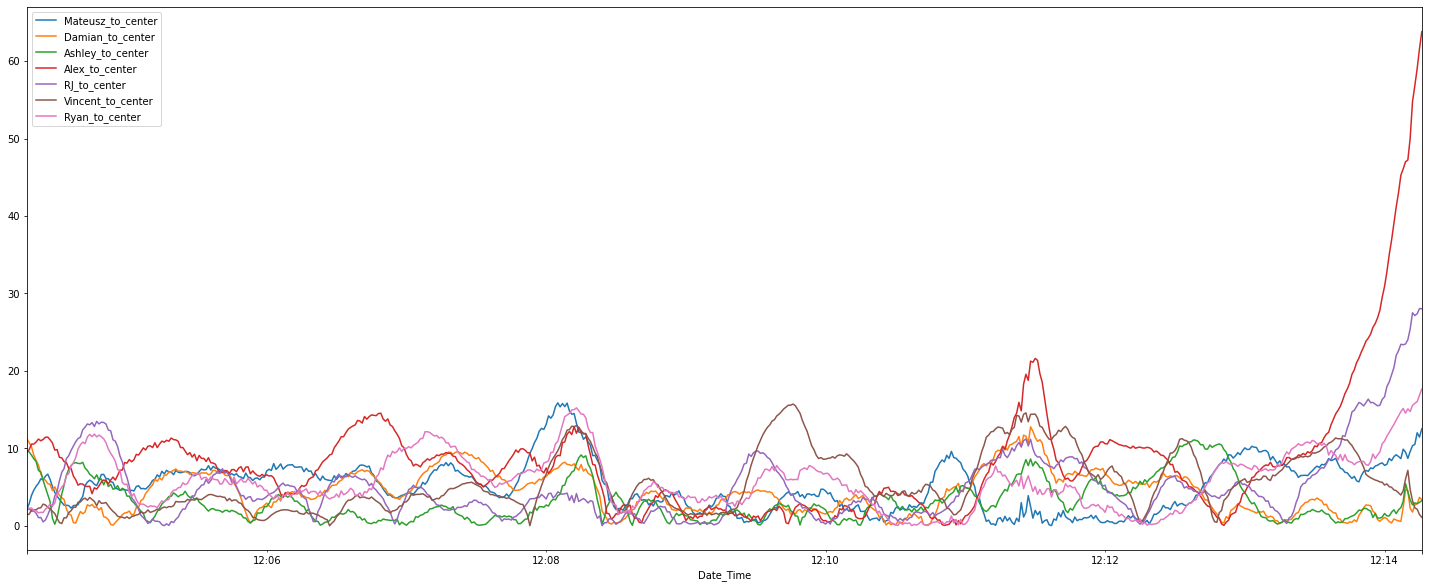

In [97]:
Gulls = team_position(Gulls, Gnames)
Gulls['Altitude_scale_1'] = Gulls.altNorm*200
col = [c for c in Gulls.columns if 'to_center' in c]
a = Gulls[:600].plot(x='Date_Time', y=col, figsize=(25,10))
# Gulls[:600].plot(x='Date_Time', y='Altitude_scale_1', figsize=(25,10), ax=a)

In [88]:

Gulls[300:301][col+['lat_center', 'lon_center', 'Latitude_Mateusz', 'Longitude_Mateusz']].head()

,Mateusz_to_center,Damian_to_center,Ashley_to_center,Alex_to_center,RJ_to_center,Vincent_to_center,Ryan_to_center,lat_center,lon_center,Latitude_Mateusz,Longitude_Mateusz
300,2.00226,5.234715,3.330243,3.862975,12.606536,3.517854,1.354307,53.977071,-1.581163,53.977069,-1.581193


# Compare teams

TypeError: index type not supported

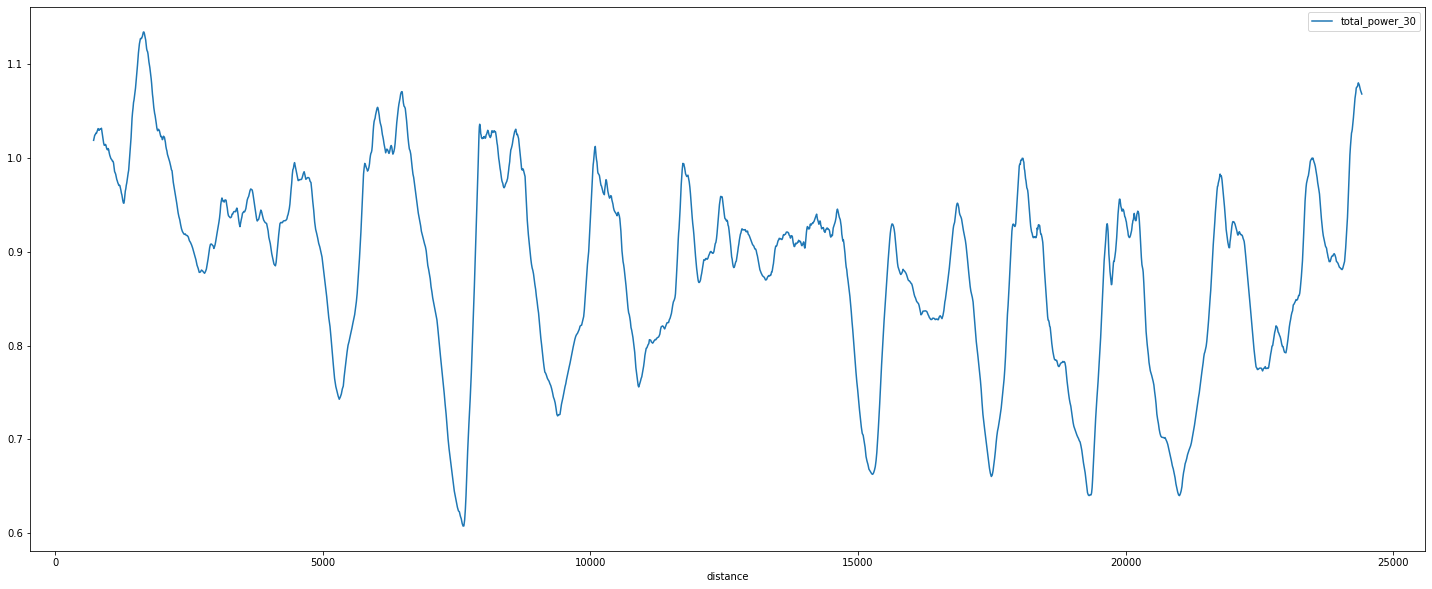

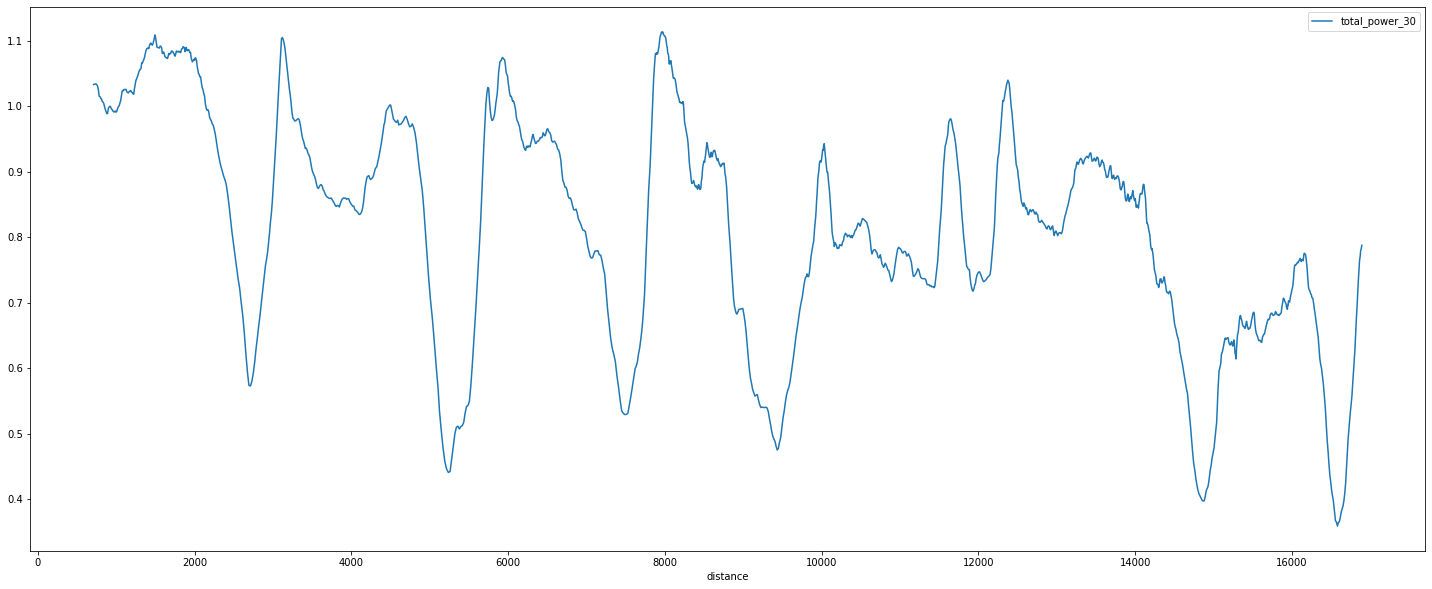

In [89]:
G = Gulls[60:-30].plot(x='distance', y='total_power_30', figsize=(25,10))
T = df[60:-30].plot(x='distance', y='total_power_30', figsize=(25,10))
Gulls[60:-30].plot(x='distance', y='altNorm', figsize=(25,10), ax=a)


In [19]:
Gulls.columns

Index(['Date_Time', 'Latitude_Mateusz', 'Longitude_Mateusz',
       'Altitude_Mateusz', 'Speed_Mateusz', 'Heartrate_Mateusz',
       'Cadence_Mateusz', 'Power_Mateusz', 'Latitude_Damian',
       'Longitude_Damian', 'Altitude_Damian', 'Speed_Damian',
       'Heartrate_Damian', 'Cadence_Damian', 'Power_Damian', 'Latitude_Ashley',
       'Longitude_Ashley', 'Altitude_Ashley', 'Speed_Ashley',
       'Heartrate_Ashley', 'Cadence_Ashley', 'Power_Ashley', 'Latitude_Alex',
       'Longitude_Alex', 'Altitude_Alex', 'Speed_Alex', 'Heartrate_Alex',
       'Cadence_Alex', 'Power_Alex', 'Latitude_RJ', 'Longitude_RJ',
       'Altitude_RJ', 'Speed_RJ', 'Heartrate_RJ', 'Cadence_RJ', 'Power_RJ',
       'Latitude_Vincent', 'Longitude_Vincent', 'Altitude_Vincent',
       'Speed_Vincent', 'Heartrate_Vincent', 'Cadence_Vincent',
       'Power_Vincent', 'Latitude_Ryan', 'Longitude_Ryan', 'Altitude_Ryan',
       'Speed_Ryan', 'Heartrate_Ryan', 'Cadence_Ryan', 'Power_Ryan',
       'total_power', 'lat_center',

In [26]:
from datetime import datetime, timedelta 
Gulls['t2'] = Gulls.Date_Time +timedelta(seconds=1)

In [27]:
Gulls[['Date_Time', 't2']]

,Date_Time,t2
0,2020-09-10 12:04:17,2020-09-10 12:04:18
1,2020-09-10 12:04:18,2020-09-10 12:04:19
2,2020-09-10 12:04:19,2020-09-10 12:04:20
3,2020-09-10 12:04:20,2020-09-10 12:04:21
4,2020-09-10 12:04:21,2020-09-10 12:04:22
...,...,...
2339,2020-09-10 12:43:16,2020-09-10 12:43:17
2340,2020-09-10 12:43:17,2020-09-10 12:43:18
2341,2020-09-10 12:43:18,2020-09-10 12:43:19
2342,2020-09-10 12:43:19,2020-09-10 12:43:20
